In [65]:
import torch #Pytorch
import torch.nn as nn #Pytorch neural network module
from torch.optim import SGD #Optimization Algorithms
import torch.nn.functional as F #Encodes the dataset
from torch.utils.data import Dataset, DataLoader #Used for managing data
import torchvision #Various resources for computer vision
import numpy as np #Handles high-level math operations
import matplotlib.pyplot as plt #Plot data for visualization

## Dataset

In [66]:
x,y = torch.load('MNIST/processed/training.pt')

/var/folders/vj/rxr6zwfn3rl3x08myxqw9ftw0000gn/T/ipykernel_14299/1099657051.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x,y = torch.load('MNIST/processed/training.pt

In [67]:
x.shape #x holds 60000 28*28 2D images
x[0].numpy()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [68]:
y.shape # y hold 60000 labels
y[0].numpy()

array(5)

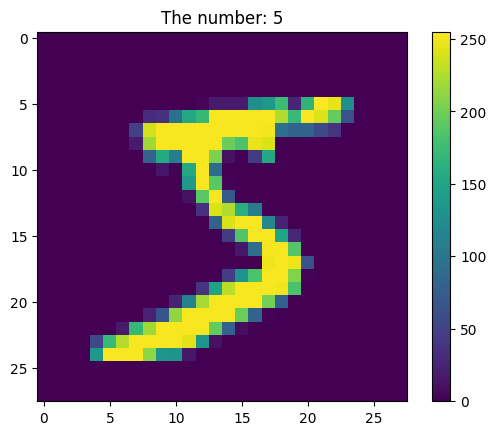

In [69]:
plt.imshow(x[0].numpy()) #Plots the image at x[0]
plt.title(f'The number: {y[0].numpy()}') #Label assiciated with x[0]
plt.colorbar() #Colorbar alongside graph
plt.show()


## The One Hot Encoder

In [70]:
y_original = torch.tensor([2, 4, 3, 0, 1])

In [71]:
#Binary representation of the  classes in y_original
F.one_hot(y_original)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [72]:
y_new = F.one_hot(y, num_classes=10) #Specify 10 classes in y
y_new.shape

torch.Size([60000, 10])

In [73]:
y_new
"""We can look and the output as a PMF
    which will later be used when training"""

'We can look and the output as a PMF\n    which will later be used when training'

## Transforming Images

In [74]:
x.shape

torch.Size([60000, 28, 28])

In [75]:
x.view(-1,28**2).shape #tranform each image to a vector

torch.Size([60000, 784])

## PyTorch Dataset Object

In [76]:
Dataset?

Init signature: Dataset()
Docstring:     
An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`. Subclasses could also
optionally implement :meth:`__getitems__`, for speedup batched samples
loading. This method accepts list of indices of samples of batch and returns
list of samples.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs an index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.
File:           ~/.pyenv/versions/3.11.11/lib/python3.11/site-pac

In [77]:
#Define our own class
class CTDataset(Dataset):
    def __init__(self, filepath) -> None:
        self.x, self.y = torch.load(filepath) #Load data from filepath
        self.x = self.x / 255 #Normalize data in x to between 0 and 1
        self.y = F.one_hot(self.y, num_classes=10).to(float) #Simply show as 0.0 or 1.0
    def __len__(self) -> int:
        return self.x.shape[0]#Return the number of images in x
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix] #Return image and label at ix

In [78]:
train_ds = CTDataset('MNIST/processed/training.pt')
test_ds = CTDataset('MNIST/processed/test.pt')

/var/folders/vj/rxr6zwfn3rl3x08myxqw9ftw0000gn/T/ipykernel_14299/2246059733.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.x, self.y = torch.load(filepath) #Load d

In [79]:
len(train_ds) #Using __len__

60000

In [80]:
train_ds[0] #Using __getitem__

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

## DataLoader Object

We can use the Dataloader class to  specify a `bath_size` when training

In [81]:
DataLoader?

Init signature:
DataLoader(
    dataset: torch.utils.data.dataset.Dataset[+_T_co],
    batch_size: Optional[int] = 1,
    shuffle: Optional[bool] = None,
    sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None,
    batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None,
    num_workers: int = 0,
    collate_fn: Optional[Callable[[List[~_T]], Any]] = None,
    pin_memory: bool = False,
    drop_last: bool = False,
    timeout: float = 0,
    worker_init_fn: Optional[Callable[[int], NoneType]] = None,
    multiprocessing_context=None,
    generator=None,
    *,
    prefetch_factor: Optional[int] = None,
    persistent_workers: bool = False,
    pin_memory_device: str = '',
)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizin

Dividing dataset of 60000 elements to 12000 batches of 5 images.

In [82]:
train_dl = DataLoader(train_ds, batch_size=5)

In [83]:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [84]:
len(train_dl) #Number of batches held by train_dl

12000